# Laboratorio 16: Laboratorio Final

## Integrante:

- Escriba Flores, Daniel Agustin

--- 

In [6]:
# Librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis 



from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ================================
import warnings
warnings.filterwarnings('ignore')

# Pregunta 1

## Seccion A:

Lea dicha data a través de un data frame, determine el tipo para cada variable, contabilice la cantidad de datos perdidos, la cantidad de filas y columnas, elimine la variable ‘Concrete compressive strength’ y calcule las distancias de Mahalanobis para el resto de variables. Luego elimine aquellas filas cuyas distancias sean mayores a 15 e indique cuántas de estas se eliminaron.


In [7]:
# Leemos los datos
data = pd.read_csv("concreto.csv")
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
# Examinamos los datos y sus tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
#Verificamos que no cuente con valores nulos
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [10]:
# contabilizamos la cantida de filas y columnas
columnasiniciales, filas = data.shape

print(f"El dataset tiene {columnasiniciales} columnas y {filas} filas")


El dataset tiene 1030 columnas y 9 filas


In [11]:
#Eliminamos la variable ‘Concrete compressive strength’ 

data = data.drop(['Concrete compressive strength'],axis=1)
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
# convirtiendo el dataframe a matriz

X = data.to_numpy()
print(X)


[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]


In [13]:
# Vector de medias para cada variables

Medias = np.mean(X,axis = 0)
Medias

array([281.16786408,  73.89582524,  54.18834951, 181.56728155,
         6.20466019, 972.91893204, 773.58048544,  45.66213592])

In [14]:
# Matriz de covariana de las variables
Covarianza = np.cov(X, rowvar=False)
Covarianza

# Inversa de la matriz  de covarianza de las variables

Inversa = np.linalg.inv(Covarianza)
Inversa

array([[ 6.85701486e-04,  7.28241223e-04,  8.93831612e-04,
         2.28446878e-03,  7.20131538e-05,  5.90025165e-04,
         7.41752489e-04,  2.69029278e-05],
       [ 7.28241223e-04,  9.77544477e-04,  1.05057074e-03,
         2.62337652e-03,  9.25996236e-05,  7.20233472e-04,
         8.86507925e-04,  5.84460836e-05],
       [ 8.93831612e-04,  1.05057074e-03,  1.50664357e-03,
         2.97006774e-03, -1.36070035e-03,  7.81092220e-04,
         1.00641670e-03,  7.66984261e-05],
       [ 2.28446878e-03,  2.62337652e-03,  2.97006774e-03,
         1.53594649e-02,  1.88661310e-02,  2.94777884e-03,
         3.29663164e-03, -1.20251101e-04],
       [ 7.20131538e-05,  9.25996236e-05, -1.36070035e-03,
         1.88661310e-02,  8.30496802e-02,  2.94819022e-03,
         1.51155690e-03, -1.63660375e-04],
       [ 5.90025165e-04,  7.20233472e-04,  7.81092220e-04,
         2.94777884e-03,  2.94819022e-03,  8.39379394e-04,
         7.93250176e-04,  2.30498703e-05],
       [ 7.41752489e-04,  8.865079

In [15]:
f = X.shape[0]
valoresmaha = []
for i in range (f):
    valor = mahalanobis(X[i],Medias,Inversa)**2
    valoresmaha.append(valor)
valoresmaha

[np.float64(13.070994050487844),
 np.float64(12.271674998255163),
 np.float64(16.505195087643862),
 np.float64(28.549966164813465),
 np.float64(30.457393999609504),
 np.float64(6.146690597681649),
 np.float64(28.527052648133584),
 np.float64(9.666122000595292),
 np.float64(7.2509210177219945),
 np.float64(14.439064343703444),
 np.float64(3.645016642861315),
 np.float64(3.257005451170856),
 np.float64(17.96174238669625),
 np.float64(6.967772127865922),
 np.float64(7.884711158265409),
 np.float64(9.393566080108023),
 np.float64(12.503685417833719),
 np.float64(27.471086287505514),
 np.float64(8.357624960910524),
 np.float64(14.15414867598596),
 np.float64(11.756650488900451),
 np.float64(11.667746347395699),
 np.float64(11.94024315494591),
 np.float64(17.551124256690475),
 np.float64(28.49125919594152),
 np.float64(17.101400679007927),
 np.float64(16.766958551992687),
 np.float64(9.513694616395327),
 np.float64(11.586082986971997),
 np.float64(15.496618141075569),
 np.float64(27.04804641

In [16]:
data['Mahalanobis'] = valoresmaha
#data ['Indices'] = data.index
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Mahalanobis
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,13.070994
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,12.271675
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,16.505195
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,28.549966
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,30.457394
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,2.868944
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,7.121385
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,3.486395
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,8.086373


In [17]:
data = data[data["Mahalanobis"] > 15]
data = data.drop(['Mahalanobis'], axis =1)
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270
...,...,...,...,...,...,...,...,...
953,158.4,0.0,194.9,219.7,11.0,897.7,712.9,28
954,150.7,0.0,185.3,166.7,15.6,1074.5,678.0,28
963,150.0,236.8,0.0,173.8,11.9,1069.3,674.8,28
971,312.7,144.7,0.0,127.3,8.0,999.7,822.2,28


In [18]:
# contabilizamos la cantidad nuevas filas y columnas
columnasfinales, filasf = data.shape

print(f"Se eleiminaron {columnasiniciales-columnasfinales} columnas ")

Se eleiminaron 925 columnas 


## Seccion B:

Realice un análisis de componentes principales para la nueva data, pero estandarizadas y por
medio del gráfico de codo tomando un porcentaje de varianza explicada de al menos 80%,
indique la cantidad de componentes que quedarían. Además, actualice los nuevos datos, pero
con las componentes elegidas como nuevas variables.


In [19]:
# Entrenando y estandarizando los datos
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(data)
modelo_pca = pca_pipe.named_steps['pca']

In [20]:
# convirtiendo el array a dataframe
pd.DataFrame(data = modelo_pca.components_,columns = data.columns,index = ['CP1','CP2','CP3','CP4','CP5','CP6','CP7','CP8'])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
CP1,0.193308,-0.096110,0.022758,-0.515243,0.526835,-0.199641,0.472909,-0.382554
CP2,0.645563,-0.509217,-0.466747,-0.049653,-0.098640,0.235040,-0.033130,0.193794
CP3,0.087718,-0.270653,0.510151,-0.138004,-0.089472,0.485310,-0.371987,-0.507788
CP4,-0.141130,0.522511,-0.470316,-0.358022,0.073832,0.582360,-0.093418,-0.066078
CP5,-0.441202,-0.377618,0.187598,-0.303709,-0.185539,0.341010,0.455117,0.421272
CP6,-0.119555,-0.160150,0.092893,0.125208,0.795118,0.153150,-0.356323,0.391304
CP7,-0.368595,-0.306638,-0.377563,0.546716,0.142929,0.187132,0.251109,-0.458427
CP8,0.416478,0.350598,0.337345,0.421923,0.110421,0.394298,0.480630,0.114617


Porcentaje de varianza explicada acumulada
[0.32671143 0.53098874 0.68929234 0.83452576 0.93556425 0.97728099
 0.99476577 1.        ]


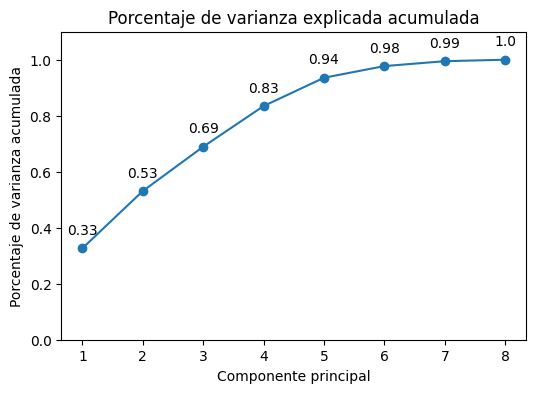

In [21]:
# Porcentaje de varianza explicada acumulada
por_var_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(por_var_acum)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax.plot(np.arange(len(data.columns)) + 1,por_var_acum, marker='o')

for x, y in zip(np.arange(len(data.columns)) + 1, por_var_acum):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax.set_ylim(0,1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada');

Del analisis graficamos, podemos interpretar que solo tomamos 3 componestes pues estos estan en menos del 80%

In [22]:
# actualizando los datos con los componentes encontrados

# Realizamos el PCA Con los 3 componentes 

pca_pipe_final = make_pipeline(StandardScaler(),PCA(n_components = 3))
pca_pipe_final.fit(data)
modelo_pca_final = pca_pipe_final.named_steps['pca']

In [24]:
# convirtiendo el array a dataframe
data2 = pd.DataFrame(data = modelo_pca_final.components_,columns = data.columns,index = ['CP1','CP2','CP3'])
data2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
CP1,0.193308,-0.096110,0.022758,-0.515243,0.526835,-0.199641,0.472909,-0.382554
CP2,0.645563,-0.509217,-0.466747,-0.049653,-0.098640,0.235040,-0.033130,0.193794
CP3,0.087718,-0.270653,0.510151,-0.138004,-0.089472,0.485310,-0.371987,-0.507788


In [25]:
# Finalmente, para actualizar los valores de las componentes principales extraemos los valores de la data con el método ‘values’ y le aplicamos el método ‘transform’ a nuestro modelo PCA, todo esto almacenado dentro de un data frame.
componentes_principales = pd.DataFrame(data = modelo_pca_final.transform(data.values),columns=['CP1','CP2','CP3'])
componentes_principales

,CP1,CP2,CP3
0,-75.342758,382.468019,53.378888
1,-111.685402,400.878454,5.139061
2,-15.921983,323.635463,-59.962362
3,-97.938059,455.730524,22.161697
4,-47.848072,492.172159,87.424159
...,...,...,...
100,74.859864,192.097726,238.274121
101,51.083255,236.496865,338.388957
102,17.889396,200.846885,177.723888
103,163.698217,334.230377,135.080454


# Pregunta 2

Una empresa comercializa dos tipos de compuestos alimenticios para animales. El primero contiene 4 unidades de compuesto del nutriente A y 2 unidades del nutriente B, mientras que el segundo contiene 2 unidades del nutriente A y 3 unidades del nutriente B. Se desea conseguir una dieta que proporcione como mínimo 20 unidades de A y 18 unidades de B, además, el costo de una unidad del primer compuesto es de 2 soles y del segundo es de 2.5 soles. Tomando como referencia el enunciado del problema 2 y haciendo uso de Python, realice lo siguiente:

In [31]:
import pulp
from scipy.optimize import linprog
from shapely.geometry import LineString


## Seccion A

Escriba el problema de programación lineal que minimice el costo y utilizando la librería ‘PuLP’, encuentre las unidades para cada tipo de compuesto que minimicen el costo, así como el costo mínimo.



### Programacion lineal

$x1$ : Unidades del primer componente alimenticio.   
$x2$ : Unidades del segundo componente alimenticio.  



Minimizar $z = 2x1 + 2.5x2$   

sujeto a  

$4x1 + 2x2 >= 20$  
$2x1 + 3x2 >= 18$  

$x1, x2 >= 0 $

In [28]:
problema = pulp.LpProblem("costo",pulp.LpMinimize)

# Variables de decisión y marcamos la no negatividad

x1 = pulp.LpVariable("x1",lowBound = 0)
x2 = pulp.LpVariable("x2",lowBound = 0)

# Función objetivo
problema += 2*x1 + 2.5*x2

#Restricciones
problema += 4*x1 +  2*x2 >= 20
problema += 2*x1 +  3*x2 >= 18


# Resolvemos y mostramos la cantidad de soluciones
sol = problema.solve()
sol

1

In [29]:
print('z_max = {0:.4f}, x1 = {1:.4f}, x2 = {2:.4f}'.
     format(pulp.value(problema.objective),pulp.value(x1),pulp.value(x2)))


z_max = 16.0000, x1 = 3.0000, x2 = 4.0000


## Seccion B
Despeje las variables de decisión a partir de las restricciones y grafique estas últimas en el plano cartesiano. Además, obtenga los vértices de la región factible, grafíquelas en el plano cartesiano e imprima las coordenadas de estos. Por último, evalúe a la función objetivo en los vértices de la región factible, imprima la solución óptima junto sus valores para la variable de decisión y grafique la región factible en el plano cartesiano.

Minimizar $z = 2x1 + 2.5x2$   

sujeto a  

$4x1 + 2x2 >= 20$  
$2x1 + 3x2 >= 18$  

$x1, x2 >= 0 $

In [35]:
# despejamos la variables y definimos las variables para tabular y graficar

x = np.arange(-150, 750, 1)
y = np.arange(-200, 1200, 1)



In [36]:
x1=(20-2*y)/4
x2=(18-3*y)/2
x3 = 0*y
y1 = 0*x

In [37]:
# Identificadores para las líneas
primera_linea = LineString(np.column_stack((x1, y)))
segunda_linea = LineString(np.column_stack((x2, y)))
tercera_linea = LineString(np.column_stack((x3, y)))
cuarta_linea = LineString(np.column_stack((x, y1)))


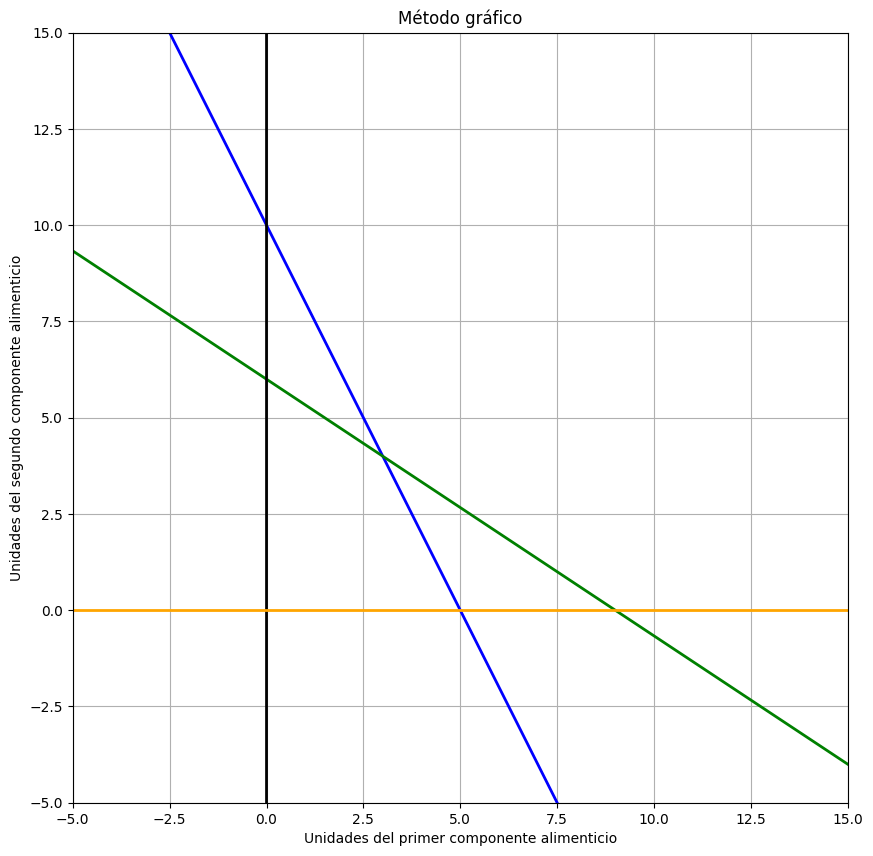

In [48]:
# Graficando las líneas
plt.figure(figsize=(10,10))
plt.plot(x1, y, '-', linewidth=2, color='blue')
plt.plot(x2, y, '-', linewidth=2, color='green')
plt.plot(x3, y, '-', linewidth=2, color='black')
plt.plot(x, y1, '-', linewidth=2, color='orange')
plt.grid()
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('Unidades del primer componente alimenticio')
plt.ylabel('Unidades del segundo componente alimenticio')
plt.title('Método gráfico')
plt.show()

In [44]:
# Generando las intersecciones (vértices)
primera_interseccion = primera_linea.intersection(segunda_linea)
segunda_interseccion = primera_linea.intersection(tercera_linea)
tercera_interseccion = segunda_linea.intersection(cuarta_linea)


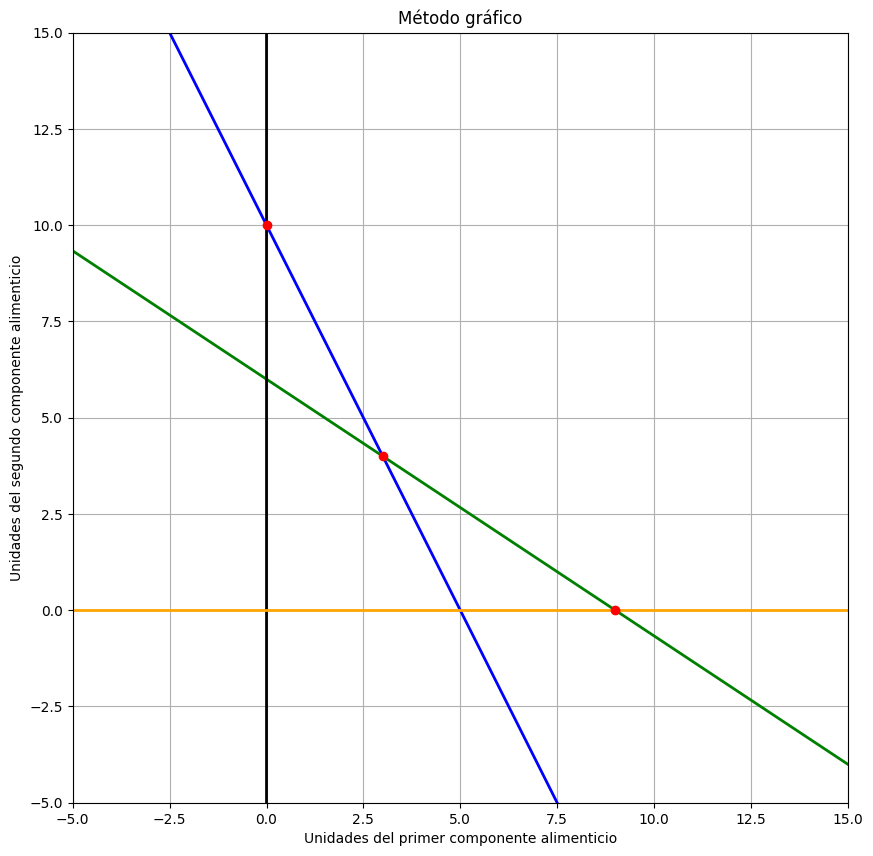

In [47]:
# Graficando los vértices
plt.figure(figsize=(10,10))
plt.plot(x1, y, '-', linewidth=2, color='blue')
plt.plot(x2, y, '-', linewidth=2, color='green')
plt.plot(x3, y, '-', linewidth=2, color='black')
plt.plot(x, y1, '-', linewidth=2, color='orange')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')


plt.grid()
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('Unidades del primer componente alimenticio')
plt.ylabel('Unidades del segundo componente alimenticio')
plt.title('Método gráfico')
plt.show()

In [49]:
# Imprimiendo las coordenadas de los vértices
print('COORDENADAS DE LAS INTERSECCIONES \n')
print('(x1, y1): {} '.format(primera_interseccion))
print('(x2, y2): {} '.format(segunda_interseccion))
print('(x3, y3): {} '.format(tercera_interseccion))


COORDENADAS DE LAS INTERSECCIONES 

(x1, y1): POINT (3 4) 
(x2, y2): POINT (0 10) 
(x3, y3): POINT (9 0) 


In [50]:
# Identificando los valores de las coordenadas x e y de cada vértice
xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy

In [51]:
# Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))

yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))


In [57]:
# Evaluando la función objetivo en cada vértice
FOi1 = 2*xi1 + 2.5*yi1
FOi2 = 2*xi2 + 2.5*yi2
FOi3 = 2*xi3 + 2.5*yi3


In [58]:
# Imprimiendo las evaluaciones de la función objetivo en cada vértice
print('EVALUACIÓN DE LA FO EN LOS VÉRTICES \n')
print('f(x1, y1) = {} soles'.format(FOi1))
print('f(x2, y2) = {} soles'.format(FOi2))
print('f(x3, y3) = {} soles'.format(FOi3))

EVALUACIÓN DE LA FO EN LOS VÉRTICES 

f(x1, y1) = 16.0 soles
f(x2, y2) = 25.0 soles
f(x3, y3) = 18.0 soles


In [61]:
# Calculando e imprimiendo la solución óptima
z_min = min(FOi1, FOi2, FOi3)
print('SOLUCIÓN ÓPTIMA \n')
print('z_max = {} soles'.format(z_min))

SOLUCIÓN ÓPTIMA 

z_max = 16.0 soles


Text(0.5, 1.0, 'Método gráfico')

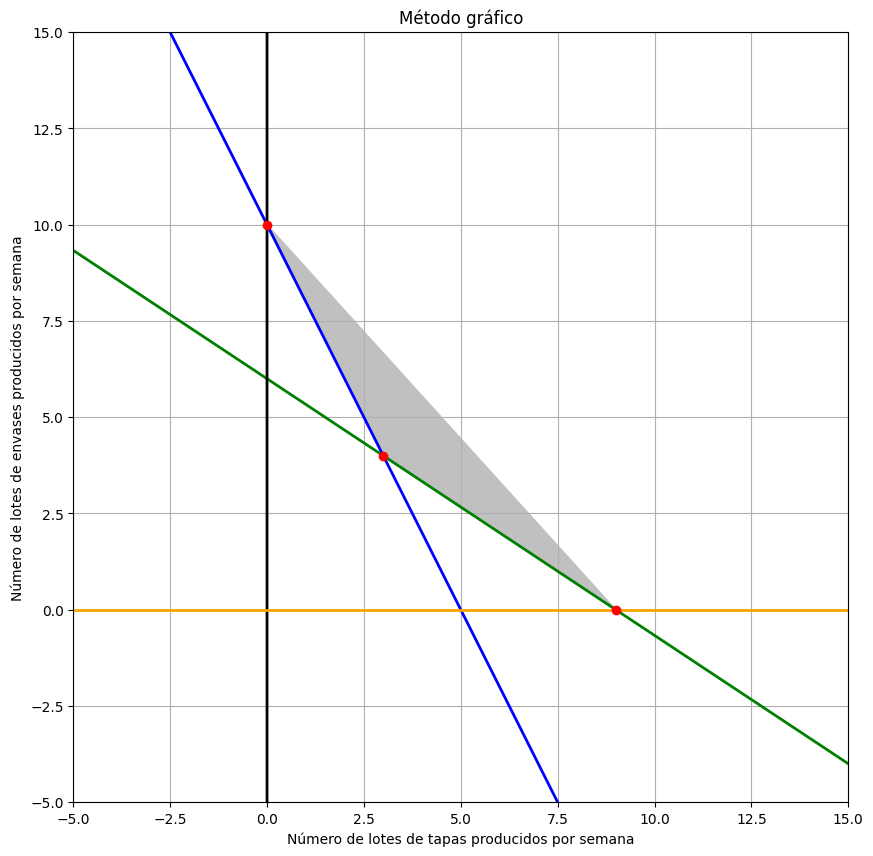

In [64]:
# Graficando la región factible a partir de las coordenadas de los vértices 
m = [xi1, xi2, xi3]
n = [yi1, yi2, yi3]
plt.figure(figsize=(10,10))
plt.plot(x1, y, '-', linewidth=2, color='blue')
plt.plot(x2, y, '-', linewidth=2, color='green')
plt.plot(x3, y, '-', linewidth=2, color='black')
plt.plot(x, y1, '-', linewidth=2, color='orange')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')

plt.fill(m, n, color='silver')
plt.grid()
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.xlabel('Número de lotes de tapas producidos por semana')
plt.ylabel('Número de lotes de envases producidos por semana')
plt.title('Método gráfico')